# **Customer Churn Prediction**

##  **Import Packages & Load Data:**

In [330]:
import pandas as pd  # data processing
import numpy as np  # Linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# custom_params = {"axes.spines.right": False, "axes.spines.top": False}  rc=custom_params,
sns.set_theme(style="darkgrid", context = "paper", palette="colorblind")

import warnings
warnings.filterwarnings('ignore')

In [331]:
df = pd.read_csv('/content/cln_customer_churn.csv')

## **Part I: Data Exploration:**

In [332]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [333]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


**1. Data Integrity**

In [334]:
 # Data types check:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [335]:
# Check for duplicates:
print("The number of duplicate records is:", df.duplicated().sum())

The number of duplicate records is: 0


**2. Missing Values**



In [336]:
# Check the na values:
print("The number of missing values is:")
df.isna().sum()

The number of missing values is:


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**3. Target Variable**




In [337]:
# The class distribution of the Churn column:
df.Churn.value_counts()

,count
Churn,
No,5163
Yes,1869


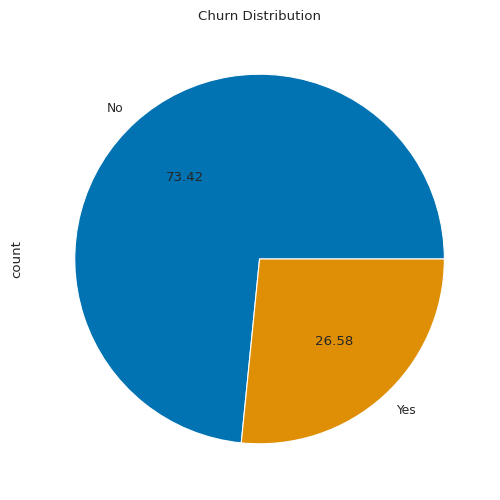

In [338]:
# Plot the distribution:
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot.pie(autopct = '%.2f')
plt.title('Churn Distribution')
plt.show()

**4. Numerical Features**



In [339]:
# Descriptive Statistics:
df[['tenure', 'TotalCharges', 'MonthlyCharges']].describe()

,tenure,TotalCharges,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,2283.300441,64.798208
std,24.545260,2266.771362,30.085974
min,1.000000,18.800000,18.250000
25%,9.000000,401.450000,35.587500
50%,29.000000,1397.475000,70.350000
75%,55.000000,3794.737500,89.862500
max,72.000000,8684.800000,118.750000


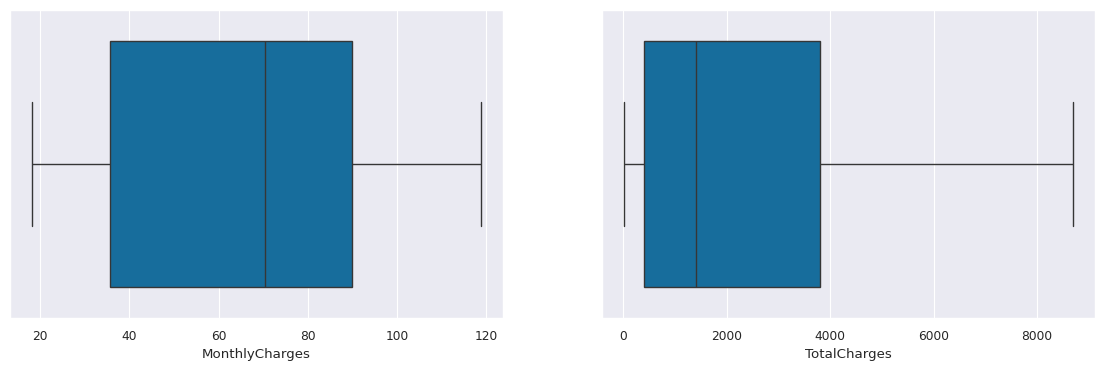

In [340]:
# Outliers Check:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
sns.boxplot(data = df, x = 'MonthlyCharges', ax= ax[0])
sns.boxplot(data = df, x = 'TotalCharges', ax= ax[1])
plt.show()

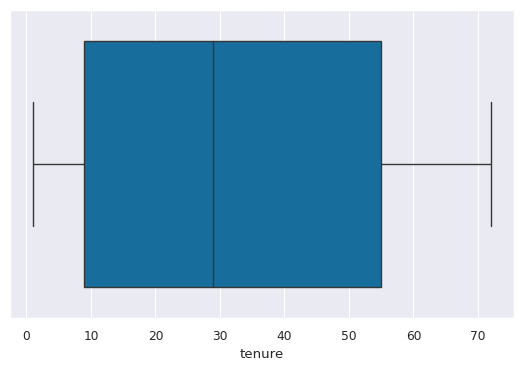

In [341]:
plt.figure(figsize=(6.5, 4))
sns.boxplot(data = df, x = 'tenure')
plt.show()

**5. Categorical Features**


In [342]:
df.describe(include = "object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [343]:
# Display unique values for each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### **Key Take Away:**
- All columns have **appropriate data types**.
- There are **no duplicates** or **missing values**.
- The class distribution of the Churn column confirms **the existence of class imbalance** where **the minority class ("Yes")** represents only **25.58%** of the data and **the majority class ("No")** represents **73.42%**.
- The numerical values **fall within logical ranges**, with no negative charges or tenure.
- The boxplots indicate that there are **no extreme outliers** for **otal Charges**, **Monthly Charges**, or **Tenure**.


---
---

## **Part II: Data Preparation modeling:**

### **A- Data Preparation:**

#### **1. Feature Selection:**


While the results of our earlier analysis (available [Here](https://github.com/mehdiben1/Customer_Churn_Analysis)) can be used to select important features based on their significant impact on churn rate, we will also leverage Random Forest to compute feature importance scores. This approach will allow us to assess whether there is alignment between the feature importance rankings derived from Random Forest and the insights obtained from the earlier churn rate analysis.

In [344]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [345]:
df1 = df

In [346]:
# Gender variable:
df1['gender'] = df1['gender'].replace({'Male': 1, 'Female': 0})

# Partner variable:
df1['Partner'] = df1['Partner'].replace({'Yes': 1, 'No': 0})

# Dependents variable:
df1['Dependents'] = df1['Dependents'].replace({'Yes': 1, 'No':0})

# PhoneService
df1['PhoneService'] = df1['PhoneService'].replace({'Yes': 1, 'No': 0})

# Pperless Billing
df1['PaperlessBilling'] = df1['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

#Internet Service
df1 = pd.get_dummies(df1, columns=['InternetService'], prefix='InternetService', drop_first=True, dtype=int)

# OnlineSecurity
df1 = pd.get_dummies(df1, columns=['OnlineSecurity'], prefix='Security', drop_first=True, dtype=int)

# OnlineBackup
df1 = pd.get_dummies(df1, columns=['OnlineBackup'], prefix='Backup', drop_first=True, dtype=int)

# DeviceProtection
df1 = pd.get_dummies(df1, columns=['DeviceProtection'], prefix='Protection', drop_first=True, dtype=int)

# TechSupport
df1 = pd.get_dummies(df1, columns=['TechSupport'], prefix='Support', drop_first=True, dtype=int)

# StreamingTV
df1 = pd.get_dummies(df1, columns=['StreamingTV'], prefix='TV', drop_first=True, dtype=int)

# StreamingMovies
df1 = pd.get_dummies(df1, columns=['StreamingMovies'], prefix='Movies', drop_first=True, dtype=int)

# Contract
df1 = pd.get_dummies(df1, columns=['Contract'], prefix='Contract', drop_first=True, dtype=int)

# PaymentMethod
df1 = pd.get_dummies(df1, columns=['PaymentMethod'], prefix='Payment', drop_first=True, dtype=int)

# Target Variable (loan_status):
df1['Churn'] = df1['Churn'].replace({'Yes': 1, 'No': 0})

# Let's check the final result:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7032 non-null   object 
 1   gender                           7032 non-null   int64  
 2   SeniorCitizen                    7032 non-null   int64  
 3   Partner                          7032 non-null   int64  
 4   Dependents                       7032 non-null   int64  
 5   tenure                           7032 non-null   int64  
 6   PhoneService                     7032 non-null   int64  
 7   MultipleLines                    7032 non-null   object 
 8   PaperlessBilling                 7032 non-null   int64  
 9   MonthlyCharges                   7032 non-null   float64
 10  TotalCharges                     7032 non-null   float64
 11  Churn                            7032 non-null   int64  
 12  InternetService_Fibe

**Feature Importance using Random Forest:**

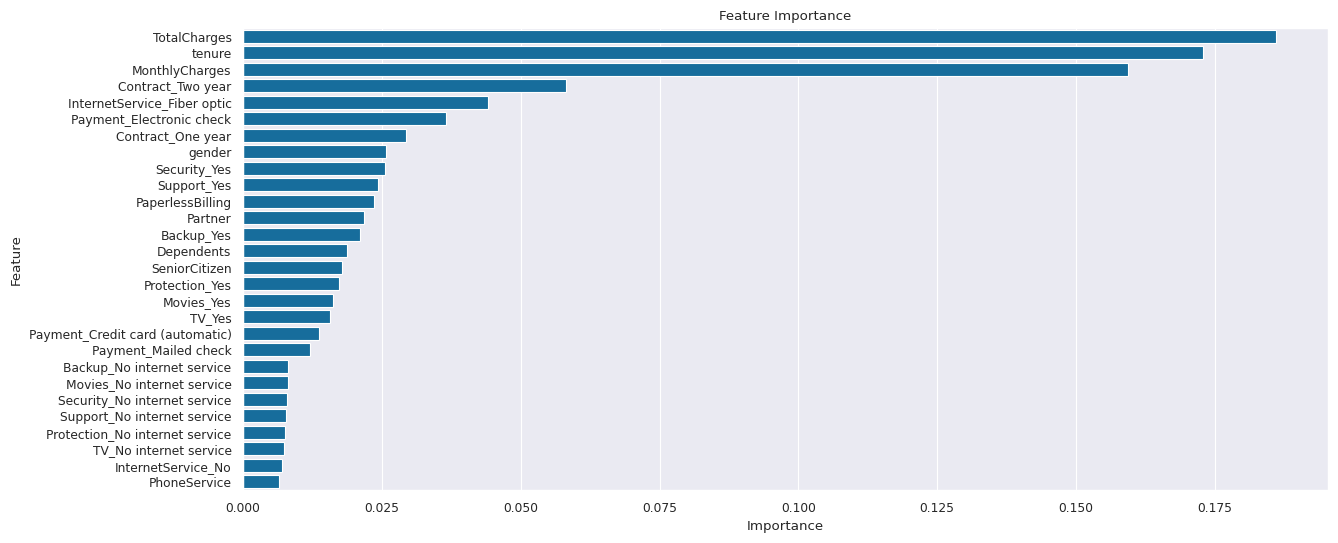

In [347]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Split the data into features (X) and target (y)
X = df1.drop(['Churn',"MultipleLines", "customerID"], axis=1)
y = df1['Churn']

# Random Forest with class weights to deal with class imbalance prob:
model = RandomForestClassifier(class_weight= 'balanced', random_state=42, n_estimators= 400)
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
#Plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

**Results of Feature Importance Analysis:**

- The Random Forest model identified the most important features influencing customer churn. Notably, there is strong alignment between the feature importance rankings derived from the Random Forest model and the insights from our earlier churn rate analysis. Specifically, **the top 17 features** highlighted by Random Forest, such as **Total Charges**, **Monthly Charges**, **Tenure**, and **Contract**, were also found to have a significant impact on churn in the earlier analysis.

- This alignment reinforces the validity of the earlier findings and provides confidence in using these features for predictive modeling. Moreover, the consistency across methods highlights the robustness of these variables as key drivers of churn.

#### **2. Encodeing Categorical Data**


In [348]:
# Gender variable:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

# Partner variable:
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})

# Dependents variable:
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No':0})

# Pperless Billing
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

#Internet Service
df = pd.get_dummies(df, columns=['InternetService'], prefix='InternetService', drop_first=True, dtype=int)

# OnlineSecurity
df = pd.get_dummies(df, columns=['OnlineSecurity'], prefix='Security', drop_first=True, dtype=int)

# OnlineBackup
df = pd.get_dummies(df, columns=['OnlineBackup'], prefix='Backup', drop_first=True, dtype=int)

# DeviceProtection
df = pd.get_dummies(df, columns=['DeviceProtection'], prefix='Protection', drop_first=True, dtype=int)

# TechSupport
df = pd.get_dummies(df, columns=['TechSupport'], prefix='Support', drop_first=True, dtype=int)

# StreamingTV
df = pd.get_dummies(df, columns=['StreamingTV'], prefix='TV', drop_first=True, dtype=int)

# StreamingMovies
df = pd.get_dummies(df, columns=['StreamingMovies'], prefix='Movies', drop_first=True, dtype=int)

# Contract
df = pd.get_dummies(df, columns=['Contract'], prefix='Contract', drop_first=True, dtype=int)

# PaymentMethod
df = pd.get_dummies(df, columns=['PaymentMethod'], prefix='Payment', drop_first=True, dtype=int)

# Target Variable (loan_status):
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# Let's check the final result:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customerID                       7032 non-null   object 
 1   gender                           7032 non-null   int64  
 2   SeniorCitizen                    7032 non-null   int64  
 3   Partner                          7032 non-null   int64  
 4   Dependents                       7032 non-null   int64  
 5   tenure                           7032 non-null   int64  
 6   PhoneService                     7032 non-null   int64  
 7   MultipleLines                    7032 non-null   object 
 8   PaperlessBilling                 7032 non-null   int64  
 9   MonthlyCharges                   7032 non-null   float64
 10  TotalCharges                     7032 non-null   float64
 11  Churn                            7032 non-null   int64  
 12  InternetService_Fibe

#### **3. Data Preprocessing:**

**1. Deleting Unnecessary Variables:**


In [349]:
df = df.drop(['customerID', 'PhoneService', 'MultipleLines'], axis=1)
df.shape

(7032, 28)

In [350]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Security_No internet service', 'Security_Yes',
       'Backup_No internet service', 'Backup_Yes',
       'Protection_No internet service', 'Protection_Yes',
       'Support_No internet service', 'Support_Yes', 'TV_No internet service',
       'TV_Yes', 'Movies_No internet service', 'Movies_Yes',
       'Contract_One year', 'Contract_Two year',
       'Payment_Credit card (automatic)', 'Payment_Electronic check',
       'Payment_Mailed check'],
      dtype='object')

**2. Splitting Data into Features and Target:**

In [351]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Import GridSearch for hyperparameter tuning:
from sklearn.model_selection import GridSearchCV

# define features and the target:
X = df.drop(['Churn'], axis=1)
y = df["Churn"]

**3. Splitting Data into Training and Testing Sets:**

In [352]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 42, stratify = y)

In [353]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5625, 27)
(5625,)
(1407, 27)
(1407,)


In [400]:
# Stratified K- Fold:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [354]:

# Over sampling the minor class to
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.8, random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print("Before over sampling:", y_train.value_counts())
print("After over sampling:", y_ros.value_counts())

Before over sampling: Churn
0    4130
1    1495
Name: count, dtype: int64
After over sampling: Churn
0    4130
1    3304
Name: count, dtype: int64


### **B- Data Modeling:**

In this part, we will build and compare multiple models. And based on their performance, we will choose the best one.

The models are:

1. **Logistic Regression**
2. **Decision Tree Classifier**
3. **Random Forest Classifier**
4. **KNN or k-Nearest Neighbors**
5. **XgBoost**
6. **Voting classifier**

#### **A. Model Building:**

In [394]:
# Import the models:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

In [356]:
from sklearn import metrics
# Import the evaluation metrics:
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score

#### **1. Logistic Regression Model:**

In [401]:
# Set the hyperparameters to check:
lr_para = {'penalty': ['l2', 'l1', 'elasticnet'], 'solver':['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
score = ['accuracy', 'f1', 'recall']
# Define the model to tune:
tuned_lr = LogisticRegression(random_state = 42)
# Implimente the hyper para in GridSearchCV:
lrt = GridSearchCV(tuned_lr, lr_para, scoring= score, cv = skf, refit = 'f1')
lrt.fit(X_ros, y_ros)
lrt.best_estimator_

LogisticRegression(random_state=42, solver='newton-cg')

In [402]:
lr = LogisticRegression(random_state=42, solver='newton-cg')
lr.fit(X_ros, y_ros)
lr_pred = lr.predict(X_test)

# Model evaluation:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.52      0.76      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407



---
---

#### **2. Decision Tree:**

In [406]:
# Set the hyperparameters to check:
dt_para = {'max_depth' : [1, 2,5, 10,15, 20, 50], 'min_samples_split' : [2, 10, 20, 30, 40, 50, 100]}
score = ['accuracy', 'f1', 'recall']
# Define the model to tune:
tuned_dt = DecisionTreeClassifier(random_state = 42)
# Implimente the hyper para in GridSearchCV:
dtt = GridSearchCV(tuned_dt, dt_para, scoring= score, cv = 10, refit = 'f1')
dtt.fit(X_ros, y_ros)
dtt.best_estimator_

DecisionTreeClassifier(max_depth=50, random_state=42)

In [407]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=100, random_state=42)
dt.fit(X_ros, y_ros)
dt_pred = dt.predict(X_test)

# Model evaluation:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1033
           1       0.50      0.76      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.74      0.75      1407



#### **3. Random Forest:**

In [408]:
rf = RandomForestClassifier(random_state = 42, n_estimators=400)
rf.fit(X_ros, y_ros)
rf_pred = rf.predict(X_test)

# Model evaluation:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1033
           1       0.58      0.56      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.78      0.78      1407



---
---

#### **4. KNN:**

In [392]:
# model complexity curve:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_ros, y_ros)
    train_accuracies[neighbor] = knn.score(X_ros, y_ros)
    test_accuracies[neighbor] = knn.score(X_test,y_test)

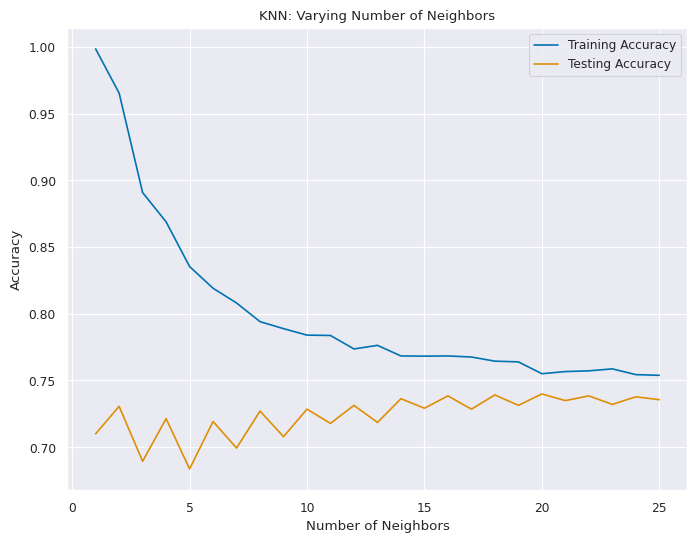

In [393]:
# Plot the result:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [386]:
knn = KNeighborsClassifier(n_neighbors  = 24)
knn.fit(X_ros, y_ros)
knn_pred = knn.predict(X_test)

# Model evaluation:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1033
           1       0.51      0.60      0.55       374

    accuracy                           0.74      1407
   macro avg       0.68      0.69      0.68      1407
weighted avg       0.75      0.74      0.74      1407



---
---

#### **5. Voting classifier:**

In [387]:
# Instantiate individual classifiers
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
SVc = SVC(random_state=42)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt), ('SVC', SVc)]

In [388]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_ros, y_ros)
vc_pred = vc.predict(X_test)

# Model evaluation:
print(classification_report(y_test, vc_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.58      0.51      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407



---
---

#### **6. XGboost:**

In [395]:
xgb = xgb.XGBClassifier(random_state = 42, objective='binary:logistic',  n_estimators=10)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Model evaluation:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



---
---

#### **B. Model Evaluation:**

Now it's time to evaluate and choose the best model. So let's compare the accuracies, f1-score and Roc of each model.

- **Accuracies:**

In [409]:
acc_lr = round(accuracy_score(lr_pred, y_test), 4)
acc_dt = round(accuracy_score(dt_pred, y_test), 4)
acc_rf = round(accuracy_score(rf_pred, y_test), 4)
acc_knn = round(accuracy_score(knn_pred, y_test), 4)
acc_xgb = round(accuracy_score(xgb_pred, y_test), 4)
acc_vc = round(accuracy_score(vc_pred, y_test), 4)

- **F1-Score:**

In [410]:
f1_lr = round(f1_score(lr_pred, y_test), 4)
f1_dt = round(f1_score(dt_pred, y_test), 4)
f1_rf = round(f1_score(rf_pred, y_test), 4)
f1_knn = round(f1_score(knn_pred, y_test), 4)
f1_xgb = round(f1_score(xgb_pred, y_test), 4)
f1_vc = round(f1_score(vc_pred, y_test), 4)

- **ROC:**

In [411]:
roc_lr = round(roc_auc_score(lr_pred, y_test), 4)
roc_dt = round(roc_auc_score(dt_pred, y_test), 4)
roc_rf = round(roc_auc_score(rf_pred, y_test), 4)
roc_knn = round(roc_auc_score(knn_pred, y_test), 4)
roc_xgb = round(roc_auc_score(xgb_pred, y_test), 4)
roc_vc = round(roc_auc_score(vc_pred, y_test), 4)

In [399]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'XGBoost', 'Voting Classifier'],
    'Accuracy': [acc_lr, acc_dt, acc_rf, acc_knn, acc_xgb, acc_vc],
    'f1_score' : [f1_lr, f1_dt, f1_rf, f1_knn, f1_xgb, f1_vc],
    'ROC': [roc_lr, roc_dt, roc_rf, roc_knn, roc_xgb, roc_vc]})
models.sort_values(by='f1_score', ascending=False)

,Model,Accuracy,f1_score,ROC
0,Logistic Regression,0.7484,0.6152,0.7063
1,Decision Tree,0.7363,0.6041,0.6974
4,XGBoost,0.7953,0.5740,0.7397
2,Random Forest,0.7768,0.5734,0.7134
3,KNN,0.7377,0.5495,0.6754
5,Voting Classifier,0.7711,0.5426,0.7044
